### Gradient Descent and Autograd

In [2]:
import torch
import numpy as np
from torch import nn
from math import pi
import matplotlib.pylab as plt

In [3]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # Interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [4]:
# @title Plotting functions

from mpl_toolkits.axes_grid1 import make_axes_locatable

def ex3_plot(model, x, y, ep, lss):
  """
  Plot training loss

  Args:
    model: nn.module
      Model implementing regression
    x: np.ndarray
      Training Data
    y: np.ndarray
      Targets
    ep: int
      Number of epochs
    lss: function
      Loss function

  Returns:
    Nothing
  """
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.set_title("Regression")
  ax1.plot(x, model(x).detach().numpy(), color='r', label='prediction')
  ax1.scatter(x, y, c='c', label='targets')
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.legend()

  ax2.set_title("Training loss")
  ax2.plot(np.linspace(1, epochs, epochs), losses, color='y')
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("MSE")

  plt.show()


def ex1_plot(fun_z, fun_dz):
  """
  Plots the function and gradient vectors

  Args:
    fun_z: f.__name__
      Function implementing sine function
    fun_dz: f.__name__
      Function implementing sine function as gradient vector

  Returns:
    Nothing
  """
  x, y = np.arange(-3, 3.01, 0.02), np.arange(-3, 3.01, 0.02)
  xx, yy = np.meshgrid(x, y, sparse=True)
  zz = fun_z(xx, yy)
  xg, yg = np.arange(-2.5, 2.6, 0.5), np.arange(-2.5, 2.6, 0.5)
  xxg, yyg = np.meshgrid(xg, yg, sparse=True)
  zxg, zyg = fun_dz(xxg, yyg)

  plt.figure(figsize=(8, 7))
  plt.title("Gradient vectors point towards steepest ascent")
  contplt = plt.contourf(x, y, zz, levels=20)
  plt.quiver(xxg, yyg, zxg, zyg, scale=50, color='r', )
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  ax = plt.gca()
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  cbar = plt.colorbar(contplt, cax=cax)
  cbar.set_label('$z = h(x, y)$')

  plt.show()

In [5]:
import torch
import numpy as np
import random

def set_seed(seed=2021):
    """Set the seed for reproducibility."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def set_device():
    """Set the device to GPU if available, otherwise CPU."""
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print("Using GPU")
    else:
        device = torch.device("cpu")
        print("Using CPU")
    return device

# Set the seed for reproducibility
SEED = 2021
set_seed(seed=SEED)

# Set the device to use GPU if available, otherwise CPU
DEVICE = set_device()


Using CPU


In [6]:
SEED = 2021
set_seed(seed=SEED)
DEVICE = set_device()

Using CPU


In [7]:
def fun_z(x, y):
    z = np.sin(x**2 + y**2)
    return z

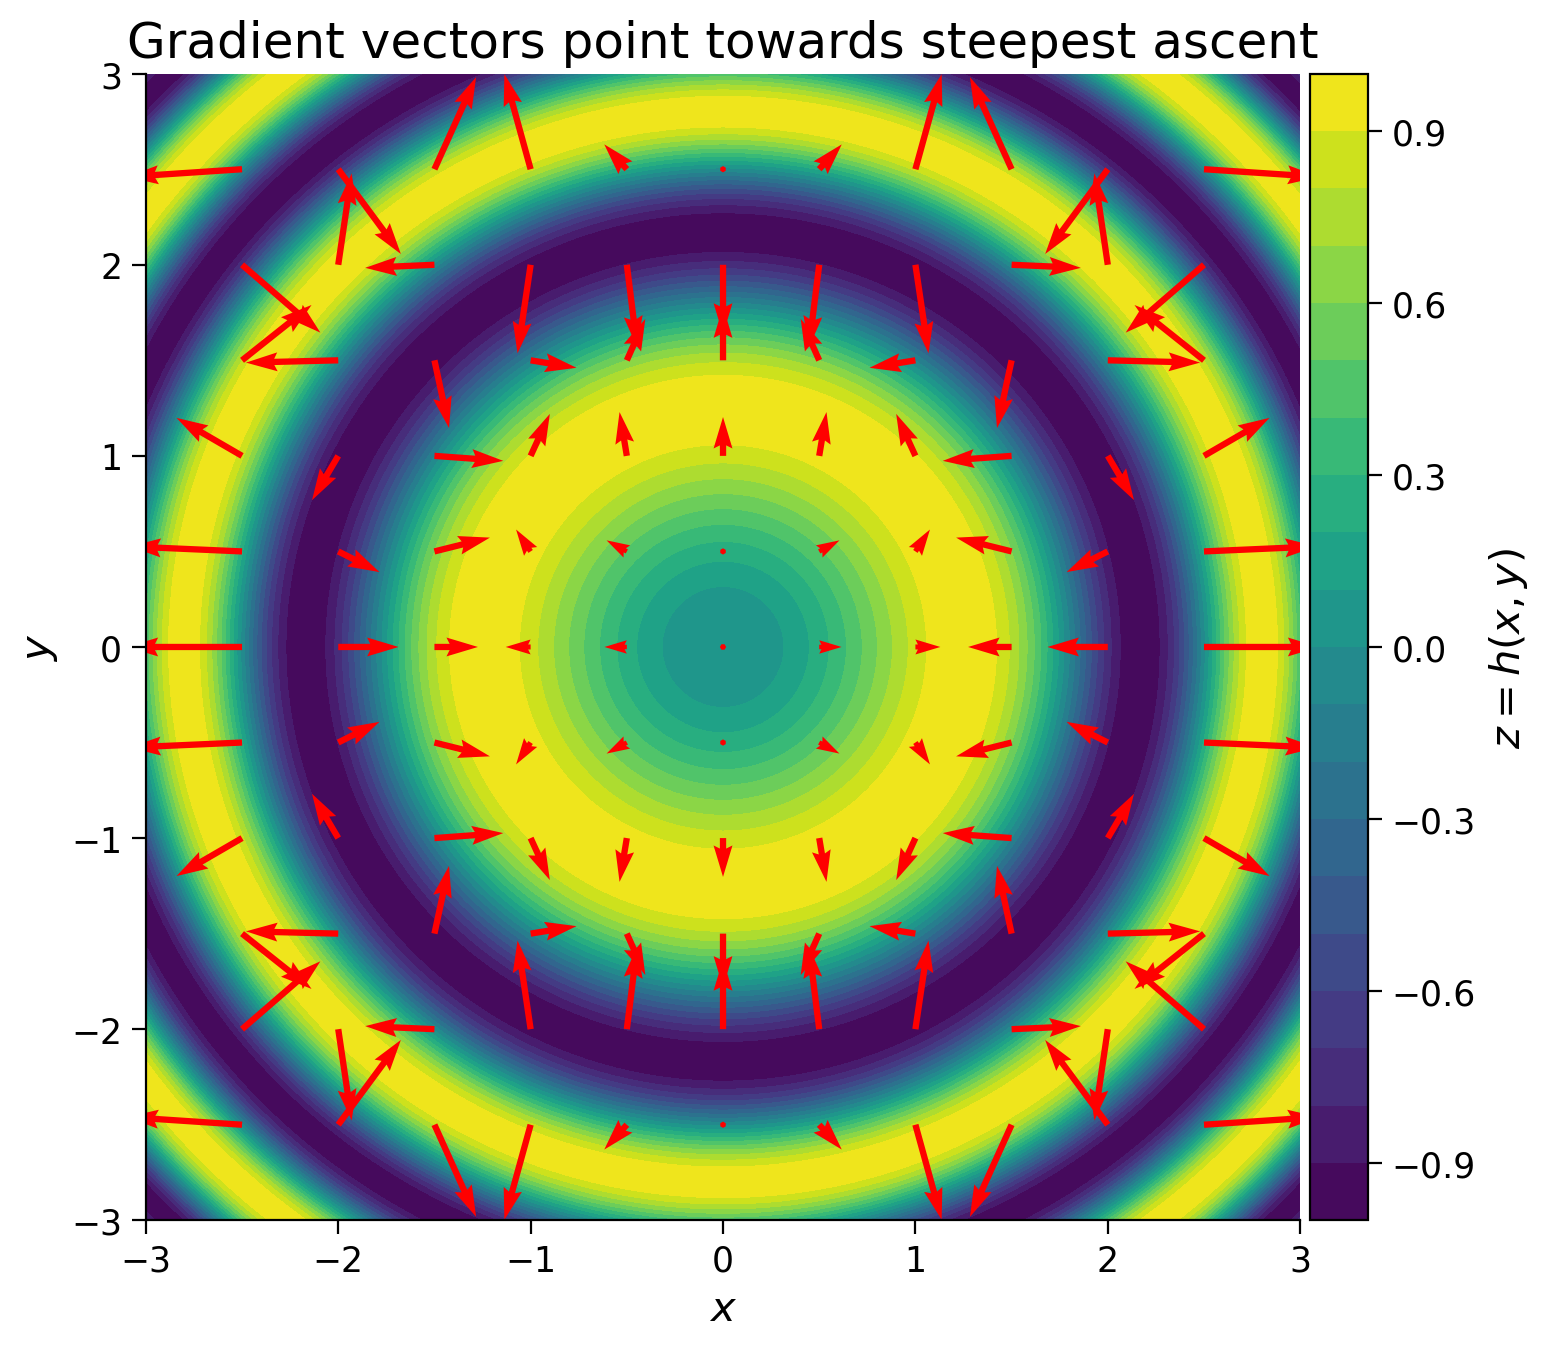

In [8]:
def fun_dz(x, y):
    dz_dx = 2*x*np.cos(x**2 + y**2)
    dz_dy = 2*y*np.sin(x**2 + y**2)
    return dz_dx, dz_dy
## Uncomment to run
ex1_plot(fun_z, fun_dz)

In [23]:
class SimpleGraph:
    def __init__(self, w, b):
        assert isinstance(w, float)
        assert isinstance(b, float)
        self.w = torch.tensor([w], requires_grad=True)
        self.b = torch.tensor([b], requires_grad=True)
    def forward(self, x):
        assert isinstance(x, torch.Tensor)
        prediction = torch.tanh((self.w * x) + self.b)
        return prediction
def sq_loss(y_true, y_prediction):
        assert isinstance(y_true, torch.Tensor)
        assert isinstance(y_prediction, torch.Tensor)
        loss = y_true - y_prediction
        return loss
feature = torch.tensor([1])  # Input tensor
target = torch.tensor([7])  # Target tensor


simple_graph = SimpleGraph(-0.5, 0.5)
print(f"initial weight = {simple_graph.w.item()}, "
      f"\ninitial bias = {simple_graph.b.item()}")
prediction = simple_graph.forward(feature)
square_loss = sq_loss(target, prediction)
print(f"for x={feature.item()} and y={target.item()}, "
      f"prediction={prediction.item()}, and L2 Loss = {square_loss.item()}")

initial weight = -0.5, 
initial bias = 0.5
for x=1 and y=7, prediction=0.0, and L2 Loss = 7.0
